<a href="https://colab.research.google.com/github/sakamototaisei/python_colab/blob/main/TPOT%E3%81%AB%E3%82%88%E3%82%8B%E5%88%86%E9%A1%9E%E3%83%A2%E3%83%87%E3%83%AB%E4%BD%9C%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TPOTとは**

## **TOPTのインストール**

http://epistasislab.github.io/tpot/

In [8]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=e3d2180113224b5dc0315e85bc71b92d5a46f2aa5bb379834563da92997acf2e
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [9]:
pip install scikit-mdr skrebate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-mdr: filename=scikit_MDR-0.4.4-py3-none-any.whl size=14645 sha256=245e15b28a1f40d02c5fefd95234ec79a4814218b224a70388de9b8595cc92f8
  Stored in directory: /root/.cache/pip/wheels/8a/4b/34/cfe1c0b394020bd579f17d7df2c7704ee22f6f1841394bed36
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29269 sha256=006656d696afbb82e39b3f30c6b2ccc5ae12b68c2b0ac5915ffdcd6b3279644b
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built scikit-mdr skrebate


# **回帰【Tips】**

## **データセットの取得**

In [10]:
import seaborn as sns

tips = sns.load_dataset('tips')

In [11]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
X = tips.drop('tip', axis=1)
y = tips['tip']

In [14]:
import pandas as pd
X = pd.get_dummies(X, drop_first=True)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bill   244 non-null    float64
 1   size         244 non-null    int64  
 2   sex_Female   244 non-null    uint8  
 3   smoker_No    244 non-null    uint8  
 4   day_Fri      244 non-null    uint8  
 5   day_Sat      244 non-null    uint8  
 6   day_Sun      244 non-null    uint8  
 7   time_Dinner  244 non-null    uint8  
dtypes: float64(1), int64(1), uint8(6)
memory usage: 5.4 KB


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [17]:
y_train.describe()

count    183.000000
mean       2.955519
std        1.380644
min        1.000000
25%        2.000000
50%        2.830000
75%        3.500000
max       10.000000
Name: tip, dtype: float64

In [18]:
y_test.describe()

count    61.000000
mean      3.126557
std       1.396124
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       9.000000
Name: tip, dtype: float64

<Axes: >

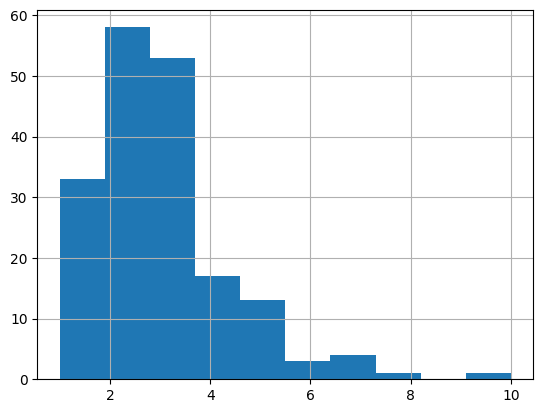

In [19]:
y_train.hist()

<Axes: >

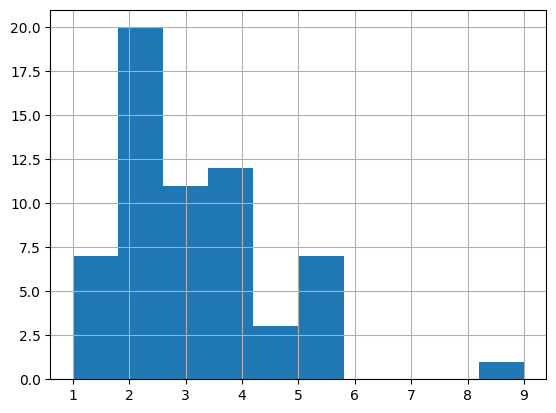

In [20]:
y_test.hist()

## **Parametersの学習**

平均二乗誤差(MSE)とは、実際の値と予測値の誤差の2乗を平均したもの

MSEでは、値が小さいほど誤差の少ないモデルと言える

$$MSE = \frac{1}{n}\sum_{i=0}^{n-1}(y_i - ̂{y}_i)^2$$

In [21]:
from tpot import TPOTRegressor

In [22]:
tpot = TPOTRegressor(
    generations=5, # パイプライン計算に使う
    population_size=5, # パイプライン計算に使う
    offspring_size=None, # パイプライン計算に使う
    mutation_rate=0.9, # デフォルト推奨
    crossover_rate=0.1, # デフォルト推奨
    scoring=None, # 
    cv=5, # 5分割交差検証(クロスバリデーション)
    subsample=1.0, # 全てのトレーニングデータを使ってパイプラインの最適化を行う(過学習の際に使える)
    n_jobs=-1, # CPUの数(-1で全てのCPUを使う)
    max_time_mins=None, # 最適化する時間
    max_eval_time_mins=5, # 値を大きくすると計算時間は上がるが精度も上がる
    random_state=None,
    config_dict=None, # デフォルト推奨
    template=None, # デフォルト推奨
    warm_start=False, # デフォルト推奨
    memory=None, # デフォルト推奨
    use_dask=False, # デフォルト推奨
    periodic_checkpoint_folder=None, # デフォルト推奨
    early_stop=None, # デフォルト推奨
    verbosity=3, # 計算結果をどの様に表示するか選択できる
    disable_update_check=False, # デフォルト推奨
    log_file=None # デフォルト推奨 
    )

In [23]:
tpot.fit(X_train, y_train)

30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	-1.2247124899734039	AdaBoostRegressor(input_matrix, AdaBoostRegressor__learning_rate=0.001, AdaBoostRegressor__loss=linear, AdaBoostRegressor__n_estimators=100)

Generation 2 - Current Pareto front scores:

-1	-1.2247124899734039	AdaBoostRegressor(input_matrix, AdaBoostRegressor__learning_rate=0.001, AdaBoostRegressor__loss=linear, AdaBoostRegressor__n_estimators=100)

-2	-1.2043937629859751	AdaBoostRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=16, XGBRegressor__n_estimators=100, XGBRegressor__n_jobs=1, XGBRegressor__objective=reg:squarederror, XGBRegressor__subsample=0.7000000000000001, XGBRegressor__verbosity=0), AdaBoostRegressor__learning_rate=0.001, AdaBoostRegressor__loss=linear, AdaBoostRegressor__n_estimators=100)

-3	-1.1912540225144106	RandomForestRegressor(PolynomialFeatures(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.35000000000000003,

TPOTRegressor(generations=5, n_jobs=-1, population_size=5, verbosity=3)

## **Functionsの学習**

In [24]:
tpot = TPOTRegressor(
    generations=5, # パイプライン計算に使う
    population_size=5, # パイプライン計算に使う
    offspring_size=None, # パイプライン計算に使う
    mutation_rate=0.9, # デフォルト推奨
    crossover_rate=0.1, # デフォルト推奨
    scoring=None, # 
    cv=5, # 5分割交差検証(クロスバリデーション)
    subsample=1.0, # 全てのトレーニングデータを使ってパイプラインの最適化を行う(過学習の際に使える)
    n_jobs=-1, # CPUの数(-1で全てのCPUを使う)
    max_time_mins=None, # 最適化する時間
    max_eval_time_mins=5, # 値を大きくすると計算時間は上がるが精度も上がる
    random_state=None,
    config_dict=None, # デフォルト推奨
    template=None, # デフォルト推奨
    warm_start=False, # デフォルト推奨
    memory=None, # デフォルト推奨
    use_dask=False, # デフォルト推奨
    periodic_checkpoint_folder=None, # デフォルト推奨
    early_stop=None, # デフォルト推奨
    verbosity=3, # 計算結果をどの様に表示するか選択できる
    disable_update_check=False, # デフォルト推奨
    log_file=None # デフォルト推奨 
    )
tpot.fit(X_train, y_train)

30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.

Generation 1 - Current Pareto front scores:

-1	-1.2475586315873577	RidgeCV(input_matrix)
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 76.

Generation 2 - Current Pareto front scores:

-1	-1.2475586315873577	RidgeCV(input_matrix)
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).



TPOTRegressor(generations=5, n_jobs=-1, population_size=5, verbosity=3)

In [25]:
tpot.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


-0.831486168665822

In [26]:
pred = tpot.predict(X_test)
pred

array([2.7225    , 2.99582278, 2.84979167, 2.03095238, 2.87581818,
       2.65716418, 2.90943396, 3.3525    , 3.01150685, 4.15714286,
       3.29666667, 3.29666667, 2.43326531, 2.02836364, 2.48852941,
       4.16266667, 1.86607143, 2.40231707, 2.75913043, 4.06901961,
       4.07409091, 2.99904762, 2.59565217, 2.4937037 , 2.41730769,
       2.85923077, 2.01493333, 4.63538462, 4.15857143, 2.46      ,
       2.42789474, 1.99232143, 2.4937037 , 1.86607143, 2.77266667,
       2.36621622, 2.63      , 1.88      , 6.73      , 2.4937037 ,
       1.90574468, 1.99232143, 2.57615385, 4.19603774, 1.98860465,
       2.65757576, 2.73166667, 3.26196429, 2.63      , 4.15857143,
       3.31461538, 2.99582278, 3.01150685, 6.53230769, 2.01493333,
       2.02836364, 4.16266667, 3.54764706, 2.43326531, 2.1437931 ,
       3.3525    ])

In [27]:
# 決定係数を算出
from sklearn.metrics import r2_score
print('R2: ', r2_score(y_test, pred))

R2:  0.5663039505643022


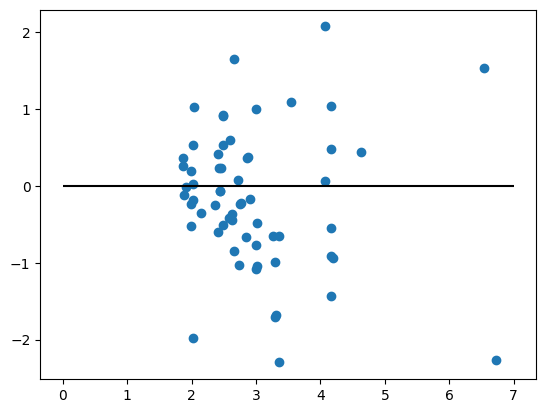

In [28]:
import matplotlib.pyplot as plt
plt.scatter(pred, pred-y_test)
plt.hlines(y=0, xmin=0, xmax=7, color='black')

<Axes: >

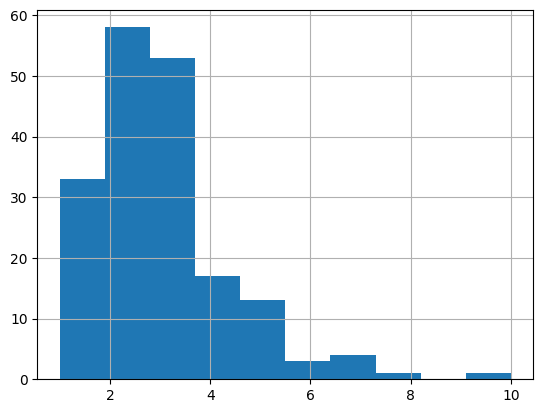

In [29]:
y_train.hist()

In [30]:
tpot.export('test.py')

## **Attributesの学習**

In [31]:
tpot.fitted_pipeline_

Pipeline(steps=[('adaboostregressor',
                 AdaBoostRegressor(learning_rate=0.1, loss='exponential',
                                   n_estimators=100))])

In [32]:
tpot.pareto_front_fitted_pipelines_

{'AdaBoostRegressor(input_matrix, AdaBoostRegressor__learning_rate=0.1, AdaBoostRegressor__loss=exponential, AdaBoostRegressor__n_estimators=100)': Pipeline(steps=[('adaboostregressor',
                  AdaBoostRegressor(learning_rate=0.1, loss='exponential',
                                    n_estimators=100))])}

In [33]:
tpot.evaluated_individuals_

{'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.05, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=5, RandomForestRegressor__n_estimators=100)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 1,
  'internal_cv_score': -1.6392282272292629},
 'ExtraTreesRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.55, ExtraTreesRegressor__min_samples_leaf=10, ExtraTreesRegressor__min_samples_split=17, ExtraTreesRegressor__n_estimators=100)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 2,
  'internal_cv_score': -1.345606521778474},
 'RandomForestRegressor(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__

In [34]:
len(tpot.evaluated_individuals_)

29

In [35]:
tpot.evaluated_individuals_.keys()

dict_keys(['RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.05, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=5, RandomForestRegressor__n_estimators=100)', 'ExtraTreesRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.55, ExtraTreesRegressor__min_samples_leaf=10, ExtraTreesRegressor__min_samples_split=17, ExtraTreesRegressor__n_estimators=100)', 'RandomForestRegressor(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.6000000000000001, RandomForestRegressor__min_samples_leaf=3, RandomForestRegressor__min_samples_split=9, RandomForestRegressor__n_estimators=100)', 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, X

# **回帰【Diamonds】**

In [36]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
X, y = diamonds.drop('price', axis=1), diamonds['price']

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
dtypes: category(3), float64(6)
memory usage: 2.6 MB


In [39]:
import pandas as pd
X = pd.get_dummies(X, drop_first=True)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [41]:
from tpot import TPOTRegressor

In [42]:
tpot = TPOTRegressor(
    generations=5, # パイプライン計算に使う
    population_size=5, # パイプライン計算に使う
    offspring_size=None, # パイプライン計算に使う
    mutation_rate=0.9, # デフォルト推奨
    crossover_rate=0.1, # デフォルト推奨
    scoring=None, # 
    cv=5, # 5分割交差検証(クロスバリデーション)
    subsample=1.0, # 全てのトレーニングデータを使ってパイプラインの最適化を行う(過学習の際に使える)
    n_jobs=-1, # CPUの数(-1で全てのCPUを使う)
    max_time_mins=None, # 最適化する時間
    max_eval_time_mins=5, # 値を大きくすると計算時間は上がるが精度も上がる
    random_state=None,
    config_dict=None, # デフォルト推奨
    template=None, # デフォルト推奨
    warm_start=False, # デフォルト推奨
    memory=None, # デフォルト推奨
    use_dask=False, # デフォルト推奨
    periodic_checkpoint_folder=None, # デフォルト推奨
    early_stop=None, # デフォルト推奨
    verbosity=3, # 計算結果をどの様に表示するか選択できる
    disable_update_check=False, # デフォルト推奨
    log_file=None # デフォルト推奨 
    )
tpot.fit(X_train, y_train)

30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_error', 'squared_epsilon_insensitive'}. Got 'squared_loss' instead..
Skipped pipeline #7 due to time out. Continuing to the next pipeline.

Generation 1 - Current Pareto front scores:

-1	-431243.0680602818	RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=19, RandomForestRegressor__min_samples_split=5, RandomForestRegressor__n_estimators=100)

-2	-379858.91367231554	XGBRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=1e-05), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=16, XGBRegressor__n_estimators=100, XGBRegressor__n_jobs=1, XGBRegressor__objective=reg:squarederr

TPOTRegressor(generations=5, n_jobs=-1, population_size=5, verbosity=3)

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [48]:
print('MSE: ', tpot.score(X_test, y_test))
pred = tpot.predict(X_test)
print('R2: ', r2_score(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


MSE:  -367644.4311768707


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


R2:  0.9769811754212627


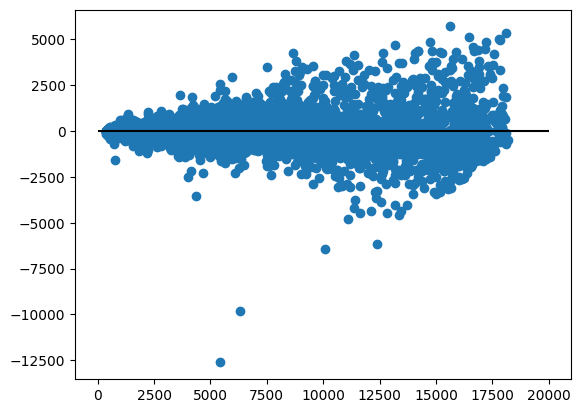

In [49]:
plt.scatter(pred, pred-y_test)
plt.hlines(y=0, xmin=0, xmax=20000, color='black')

<Axes: >

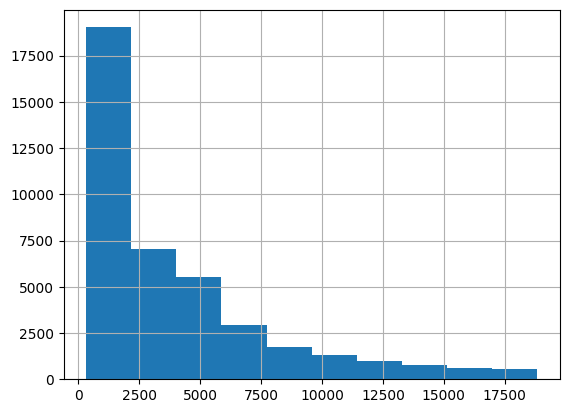

In [50]:
y_train.hist()

# **回帰【Boston Housing】**